In [18]:
import numpy as np


class MyNN:

    def __init__(self, l, q, d,
                 etall=.5, eta1=None, eta2=None,
                 ):
        self.eta1 = eta1 if eta1 is not None else etall
        self.eta2 = eta2 if eta2 is not None else etall

        self.l = l
        self.q = q
        self.d = d

        self.V = np.random.rand(d, q)
        self.W = np.random.rand(q, l)
        self.THETA = np.random.rand(l)
        self.GAMMA = np.random.rand(q)

        self.errs = list()

    def __f(self, X):
        return 1 / (1 + np.exp(-X))

    def estimate(self, X):
        X = np.asarray(X)
        ALPHA = np.matmul(X, self.V)
        B = self.__f(ALPHA - self.GAMMA)
        BETA = np.matmul(B, self.W)
        Y = self.__f(BETA-self.THETA)
        return Y

    def ek(self, X, Y):
        YB = self.estimate(X)

        Y = np.asarray(Y)
        YYB = Y - YB
        err = np.matmul(YYB, YYB)/2.0
        return err

    def bp(self, X, Y):

        X = np.asarray(X)
        Y = np.asarray(Y)
        e1 = self.eta1
        e2 = self.eta2

        ALPHA = np.matmul(X, self.V)
        B = self.__f(ALPHA - self.GAMMA)
        BETA = np.matmul(B, self.W)
        YB = self.__f(BETA-self.THETA)

        YYB = Y - YB
        err = np.matmul(YYB, YYB)/2.0
        self.errs.append(err)
        # print(err)

        G = YB * (1 - YB) * YYB
        E = B * (1 - B) * np.matmul(self.W, self.THETA)

        G1 = e1*G
        E2 = e2*E

        self.THETA = self.THETA - G1
        self.W = self.W + np.outer(B, G1)

        self.GAMMA = self.GAMMA - E2
        self.V = self.V + np.outer(X, E2)



In [25]:
def test_argmax(d=8):
    n_epochs = 1
    n_samples = 1024
    n1 = 256
    dnn = MyNN([d, d, d], etall=0.005)


    def get_in(x):
        X = np.random.random_sample(d) / 1000.0
        X[(x+1) % d] += 1 - np.sum(X)
        return X


    def test():
        vv = 0
        for i in np.random.randint(d, size=n1):
            if np.argmax(dnn.estimate(get_in(i))) == i:
                vv += 1
        return vv / n1


    rate = list()
    flg = 0
    while flg < n_epochs:
        for i, x in enumerate(np.random.randint(d, size=n_samples)):
            X = get_in(x)
            Y = np.zeros(d)
            Y[x % d] = 1
            dnn.bp(X, Y)
            vv = test()
            rate.append(test())
        flg += 1

    dnn.draw(title='argmax-1', rate=rate)


In [27]:
def test_sum(l=8):
    n_samples = 1024
    dnn = MyNN([l*8, 16, l], etall=0.001)
    for x in range(n_samples):
        X = np.random.random_sample(l*8)
        X /= np.sum(X)
        Y = np.asarray([np.sum(X[i*8:(i+1)*8]) for i in range(l)])
        dnn.bp(X, Y)

    dnn.draw(title='sum')


In [21]:
def test_equal(d=8):
    n_samples = 1024
    dnn = MyNN([d, 9, 13, d], etall=0.001)
    for x in range(n_samples):
        X = np.random.random_sample(d)
        X /= np.sum(X)
        dnn.bp(X, X)

    dnn.draw(title='equal')


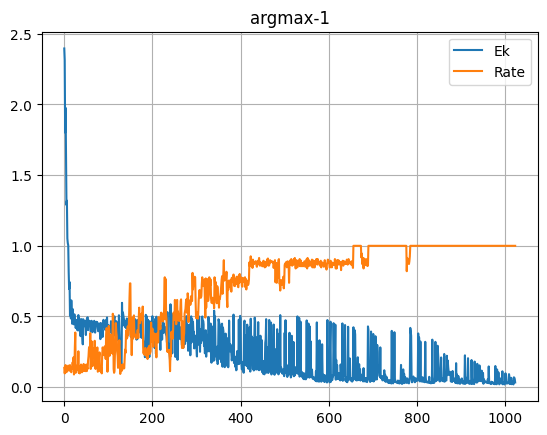

<Figure size 640x480 with 0 Axes>

In [26]:
test_argmax()

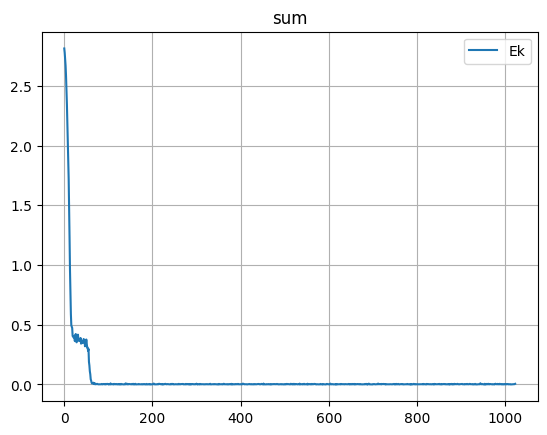

<Figure size 640x480 with 0 Axes>

In [28]:
test_sum()

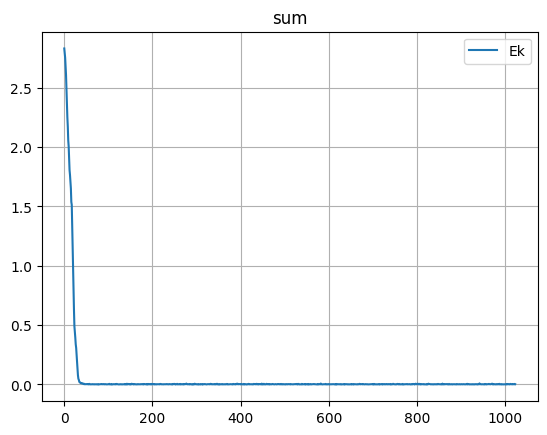

<Figure size 640x480 with 0 Axes>

In [24]:
test_equal()